In [66]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings("ignore")

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('main_data.csv',encoding='cp949')

In [6]:
df.drop(['long','lat','gu'],axis=1,inplace=True)

In [7]:
df

,소재지면적,near_cafe,near_bus,near_bus_commute,near_bus_transfer,near_bus_many,near_subway100,near_subway600,near_subway_commute,near_subway_transfer,...,area_avgCustomer,area_count,저가,고가,기타,발달상권,골목상권,기타상권,무소속,target
0,52.50,31,2,0,1,0,0,2,2,0,...,98875.193548,1,0,1,0,1,0,0,0,0
1,45.50,1,0,0,0,0,0,2,0,2,...,484465.838710,1,0,0,1,0,1,0,0,1
2,28.00,8,8,4,2,4,1,1,0,1,...,484465.838710,1,0,0,1,0,1,0,0,0
3,13.78,10,3,1,1,1,0,2,2,2,...,249363.838710,2,0,0,1,1,0,0,0,0
4,42.98,5,5,1,3,5,0,0,0,0,...,0.000000,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42652,16.00,7,0,0,0,0,0,0,0,0,...,633686.451613,2,1,0,0,0,1,0,0,0
42653,59.89,8,2,0,2,0,0,3,0,3,...,0.000000,0,1,0,0,0,0,0,1,1
42654,26.40,4,5,1,2,2,0,1,1,1,...,145885.774194,2,1,0,0,0,0,1,0,1
42655,22.50,3,3,0,1,1,0,1,1,0,...,394348.354839,2,1,0,0,0,1,0,0,0


In [8]:
from statsmodels.formula.api import ols

In [9]:
model = ols('target ~ 소재지면적 + near_cafe + near_cafe +near_bus_commute+near_bus_transfer+\
            near_bus_many+near_subway100+near_subway600+near_subway_commute+near_subway_transfer+\
            near_subway_many+gu_pop+gu_work+gu_rate_2030+gu_rate_405060+gu_density+near_culture+\
            area_cafe+area_store+area_avgTake+area_avgCustomer+area_count+저가+고가+기타+\
            발달상권+골목상권+기타상권+무소속', df)

In [10]:
res = model.fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     39.53
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.56e-197
Time:                        14:38:18   Log-Likelihood:                -27636.
No. Observations:               42657   AIC:                         5.533e+04
Df Residuals:                   42630   BIC:                         5.556e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1758      0.065      2.707      0.007       0.049       0.303
소재지면적                    0.0004   4.03e-05      9.973      0.000       0.000       0.000
near_cafe               -0.0005      0.000     -1.426      0.154      -0.001       0.000
near_bus_commute         0.0054      0.002      3.200      0.001       0.002       0.009
near_bus_transfer       -0.0020      0.002     -1.081      0.280      -0.006       0.002
near_bus_many            0.0014      0.002      0.873      0.383      -0.002       0.004
near_subway100           0.0254      0.008      2.996      0.003       0.009       0.042
near_subway600          -0.0190      0.006     -3.049      0.002      -0.031      -0.007
near_subway_commute     -0.0004      0.005     -0.098      0.922      -0.009       0.008
near_subway_transfer     0.0403      0.005      8.077      0.000       0.031       0.050
near_subway_many        -0.0243      0.005     -5.126      0.000      -0.034      -0.015
gu_pop               -2.114e-07   2.12e-08     -9.957      0.000   -2.53e-07    -1.7e-07
gu_work               2.319e-07   3.53e-08      6.566      0.000    1.63e-07    3.01e-07
gu_rate_2030             0.5780      0.148      3.913      0.000       0.288       0.868
gu_rate_405060           0.6559      0.134      4.890      0.000       0.393       0.919
gu_density            1.269e-07   7.42e-07      0.171      0.864   -1.33e-06    1.58e-06
near_culture             0.0014      0.000      6.030      0.000       0.001       0.002
area_cafe                0.0021      0.001      3.761      0.000       0.001       0.003
area_store              -0.0015      0.001     -2.759      0.006      -0.003      -0.000
area_avgTake         -1.285e-12   4.61e-12     -0.279      0.780   -1.03e-11    7.75e-12
area_avgCustomer      2.494e-08   6.97e-09      3.576      0.000    1.13e-08    3.86e-08
area_count               0.0012      0.005      0.243      0.808      -0.009       0.011
저가                       0.1002      0.023      4.287      0.000       0.054       0.146
고가                       0.0570      0.023      2.444      0.015       0.011       0.103
기타                       0.0186      0.022      0.843      0.399      -0.025       0.062
발달상권                     0.0211      0.017      1.225      0.221      -0.013       0.055
골목상권                     0.0339      0.017      2.028      0.043       0.001       0.067
기타상권                     0.0637      0.017      3.673      0.000       0.030       0.098
무소속                      0.0571      0.017      3.302      0.001       0.023       0.091
==============================================================================
Omnibus:                   628214.709   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7106.91

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
model.exog_names

['Intercept',
 '소재지면적',
 'near_cafe',
 'near_bus_commute',
 'near_bus_transfer',
 'near_bus_many',
 'near_subway100',
 'near_subway600',
 'near_subway_commute',
 'near_subway_transfer',
 'near_subway_many',
 'gu_pop',
 'gu_work',
 'gu_rate_2030',
 'gu_rate_405060',
 'gu_density',
 'near_culture',
 'area_cafe',
 'area_store',
 'area_avgTake',
 'area_avgCustomer',
 'area_count',
 '저가',
 '고가',
 '기타',
 '발달상권',
 '골목상권',
 '기타상권',
 '무소속']

In [15]:
variance_inflation_factor(model.exog,1)

1.2855349427107052

In [16]:
variance_inflation_factor(model.exog, 2)

2.3437889197715807

In [17]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\Users\KI\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,소재지면적,1.285535
1,near_cafe,2.343789
2,near_bus_commute,1.432486
3,near_bus_transfer,1.237853
4,near_bus_many,1.700576
5,near_subway100,1.111031
6,near_subway600,4.522441
7,near_subway_commute,1.932906
8,near_subway_transfer,2.953532
9,near_subway_many,2.450054


In [18]:
df

,소재지면적,near_cafe,near_bus,near_bus_commute,near_bus_transfer,near_bus_many,near_subway100,near_subway600,near_subway_commute,near_subway_transfer,...,area_avgCustomer,area_count,저가,고가,기타,발달상권,골목상권,기타상권,무소속,target
0,52.50,31,2,0,1,0,0,2,2,0,...,98875.193548,1,0,1,0,1,0,0,0,0
1,45.50,1,0,0,0,0,0,2,0,2,...,484465.838710,1,0,0,1,0,1,0,0,1
2,28.00,8,8,4,2,4,1,1,0,1,...,484465.838710,1,0,0,1,0,1,0,0,0
3,13.78,10,3,1,1,1,0,2,2,2,...,249363.838710,2,0,0,1,1,0,0,0,0
4,42.98,5,5,1,3,5,0,0,0,0,...,0.000000,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42652,16.00,7,0,0,0,0,0,0,0,0,...,633686.451613,2,1,0,0,0,1,0,0,0
42653,59.89,8,2,0,2,0,0,3,0,3,...,0.000000,0,1,0,0,0,0,0,1,1
42654,26.40,4,5,1,2,2,0,1,1,1,...,145885.774194,2,1,0,0,0,0,1,0,1
42655,22.50,3,3,0,1,1,0,1,1,0,...,394348.354839,2,1,0,0,0,1,0,0,0


In [34]:
df_sc1=df.iloc[:,11:15]

In [35]:
df_sc2=df.iloc[:,17:21]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
scaler1 = scaler.fit_transform(df_sc1)

In [38]:
scaler2 = scaler.fit_transform(df_sc2)

In [39]:
df_sced1=pd.DataFrame(scaler1)

In [40]:
df_sced2=pd.DataFrame(scaler2)

In [41]:
df_sced1.columns=df_sc1.columns

In [42]:
df_sced2.columns=df_sc2.columns

In [45]:
d2f=df.drop(['gu_pop','gu_work','gu_rate_2030','gu_rate_405060','area_cafe','area_store','area_avgTake','area_avgCustomer'],axis=1)

In [47]:
df_concat = pd.concat([d2f,df_sced1,df_sced2],axis=1)
df_concat

,소재지면적,near_cafe,near_bus,near_bus_commute,near_bus_transfer,near_bus_many,near_subway100,near_subway600,near_subway_commute,near_subway_transfer,...,무소속,target,gu_pop,gu_work,gu_rate_2030,gu_rate_405060,area_cafe,area_store,area_avgTake,area_avgCustomer
0,52.50,31,2,0,1,0,0,2,2,0,...,0,0,2.199637,2.132034,0.212678,-0.973090,0.462019,1.152632,1.380128,-0.474551
1,45.50,1,0,0,0,0,0,2,0,2,...,0,1,-1.122243,-1.104806,-0.865142,1.795430,-0.120637,-0.241472,-0.331481,0.144206
2,28.00,8,8,4,2,4,1,1,0,1,...,0,0,-1.122243,-1.104806,-0.865142,1.795430,-0.120637,-0.241472,-0.331481,0.144206
3,13.78,10,3,1,1,1,0,2,2,2,...,0,0,-0.878668,-0.787117,-1.170651,0.033258,0.046793,-0.007622,-0.011246,-0.233062
4,42.98,5,5,1,3,5,0,0,0,0,...,1,1,2.199637,2.132034,0.212678,-0.973090,-0.475589,-0.484316,-0.403894,-0.633216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42652,16.00,7,0,0,0,0,0,0,0,0,...,0,0,-0.617810,-0.912642,0.184037,0.037401,-0.167518,-0.277449,-0.391787,0.383660
42653,59.89,8,2,0,2,0,0,3,0,3,...,1,1,0.050581,-0.206830,2.091328,-2.182180,-0.475589,-0.484316,-0.403894,-0.633216
42654,26.40,4,5,1,2,2,0,1,1,1,...,0,1,-0.763937,-0.857859,-1.662209,1.007583,-0.395223,-0.389877,-0.308739,-0.399114
42655,22.50,3,3,0,1,1,0,1,1,0,...,0,0,-0.617810,-0.912642,0.184037,0.037401,-0.475589,-0.484316,-0.382411,-0.000406


In [54]:
model = ols('target ~ 소재지면적 + near_cafe + near_cafe +near_bus_commute+near_bus_transfer+\
            near_bus_many+near_subway100+near_subway600+near_subway_commute+near_subway_transfer+\
            near_subway_many+gu_pop+gu_work+gu_rate_2030+gu_rate_405060+gu_density+near_culture+\
            area_cafe+area_store+area_avgTake+area_avgCustomer+area_count+저가+고가+기타+\
            발달상권+골목상권+기타상권+무소속', df_concat)

In [50]:
variance_inflation_factor(model.exog, 1)

1.2855349427108846

In [55]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

C:\Users\KI\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,소재지면적,1.285535
1,near_cafe,2.343789
2,near_bus_commute,1.432486
3,near_bus_transfer,1.237853
4,near_bus_many,1.700576
5,near_subway100,1.111031
6,near_subway600,4.522441
7,near_subway_commute,1.932906
8,near_subway_transfer,2.953532
9,near_subway_many,2.450054


In [57]:
df3=df.drop(['gu_pop','area_store'],axis=1)

In [59]:
model3 = ols('target ~ 소재지면적 + near_cafe + near_cafe +near_bus_commute+near_bus_transfer+\
            near_bus_many+near_subway100+near_subway600+near_subway_commute+near_subway_transfer+\
            near_subway_many+gu_work+gu_rate_2030+gu_rate_405060+gu_density+near_culture+\
            area_cafe+area_avgTake+area_avgCustomer+area_count+저가+고가+기타+\
            발달상권+골목상권+기타상권+무소속', df3)

In [61]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')

C:\Users\KI\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,소재지면적,1.282890
1,near_cafe,2.250091
2,near_bus_commute,1.409516
3,near_bus_transfer,1.233881
4,near_bus_many,1.666695
5,near_subway100,1.110519
6,near_subway600,4.505161
7,near_subway_commute,1.905674
8,near_subway_transfer,2.879942
9,near_subway_many,2.440256


In [62]:
df3_corr=df3.corr()

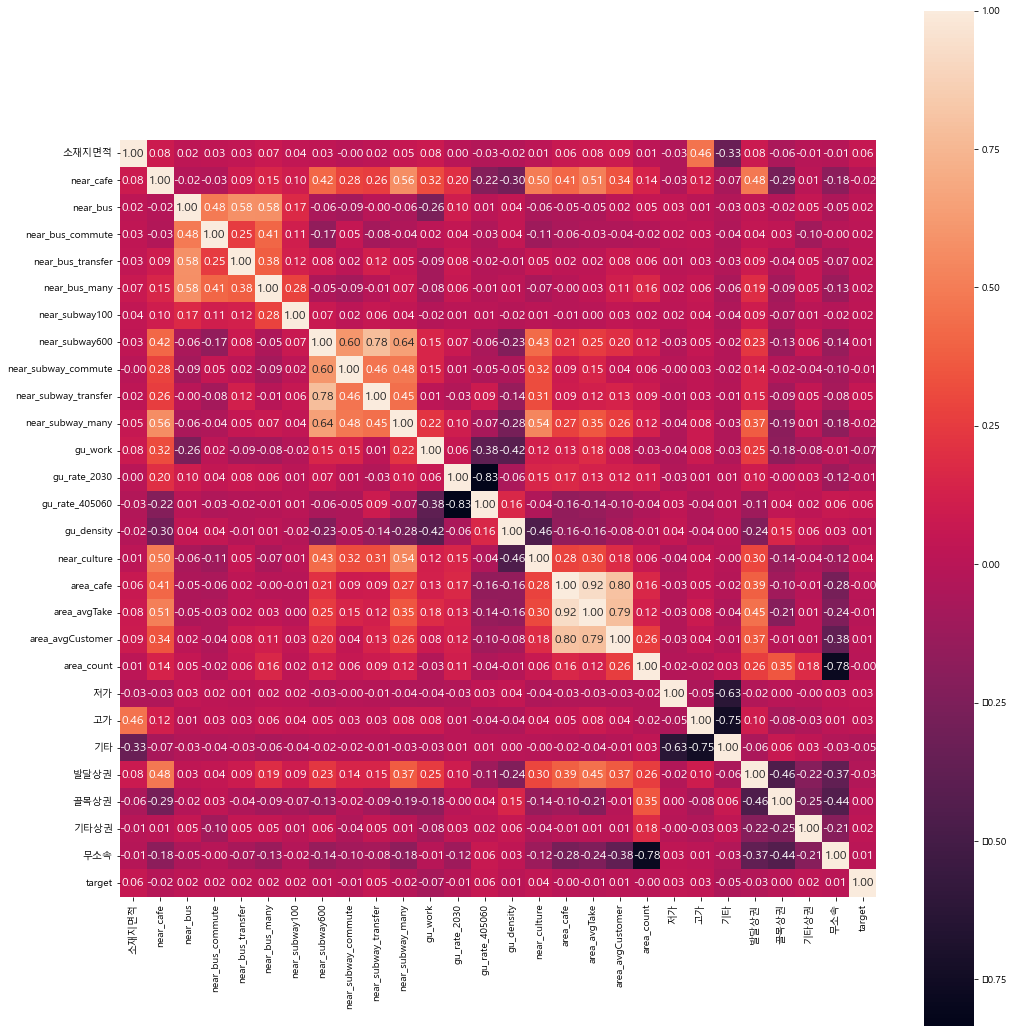

In [67]:
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(15,15))
hm = sns.heatmap(df3_corr,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12},
                yticklabels=df3_corr.columns,
                xticklabels=df3_corr.columns)
plt.tight_layout()
plt.show()